In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# ============================ DATA ANALYSIS & VISUALIZATION ============================
# Display first few rows
print("🔹 First 5 rows of dataset:")
print(df.head())

# Basic info
print("\n🔹 Dataset Info:")
print(df.info())


🔹 First 5 rows of dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), obje

In [4]:

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())



🔹 Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


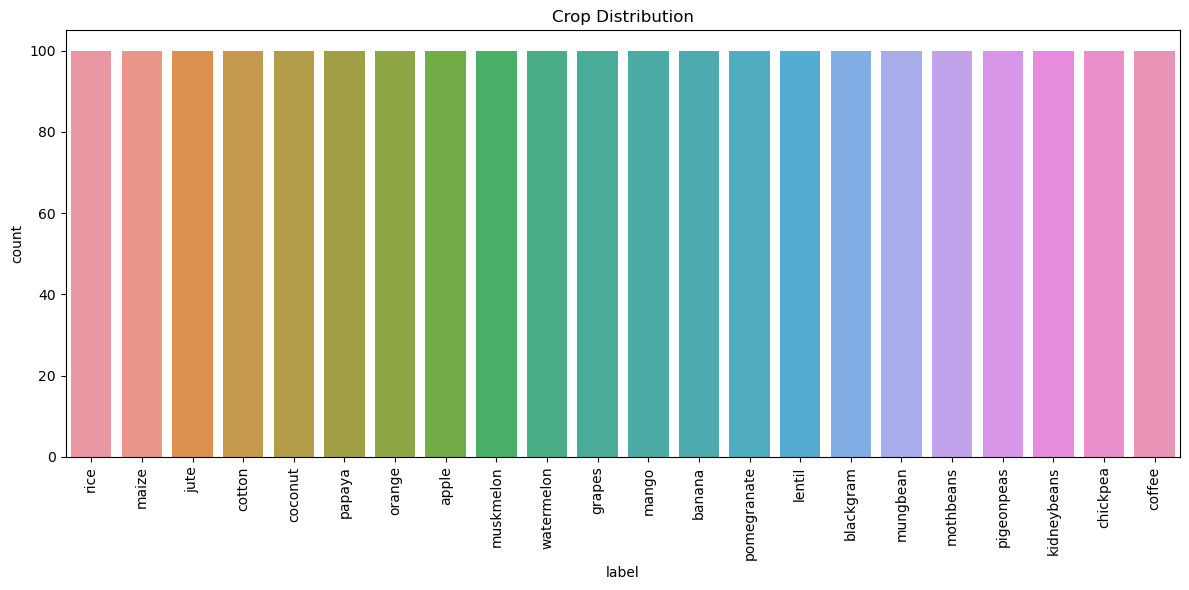

In [5]:

# Crop Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.tight_layout()
plt.savefig('crop_distribution.png')
plt.show()


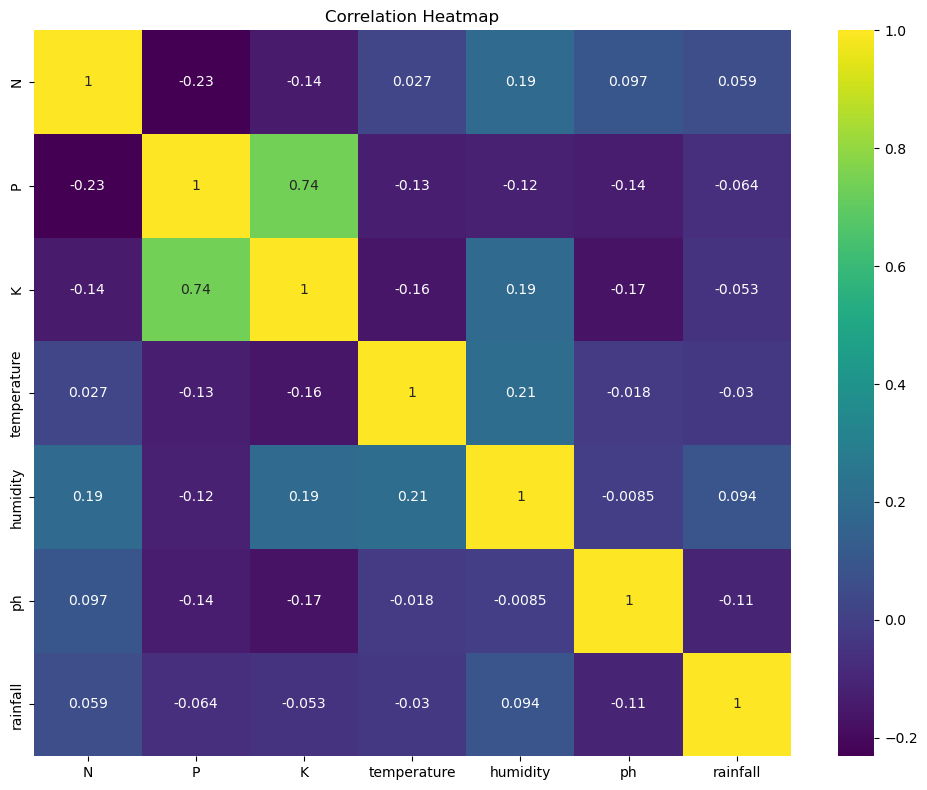

In [6]:

# Drop non-numeric columns before correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # or df.drop(['label'], axis=1) if still present
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


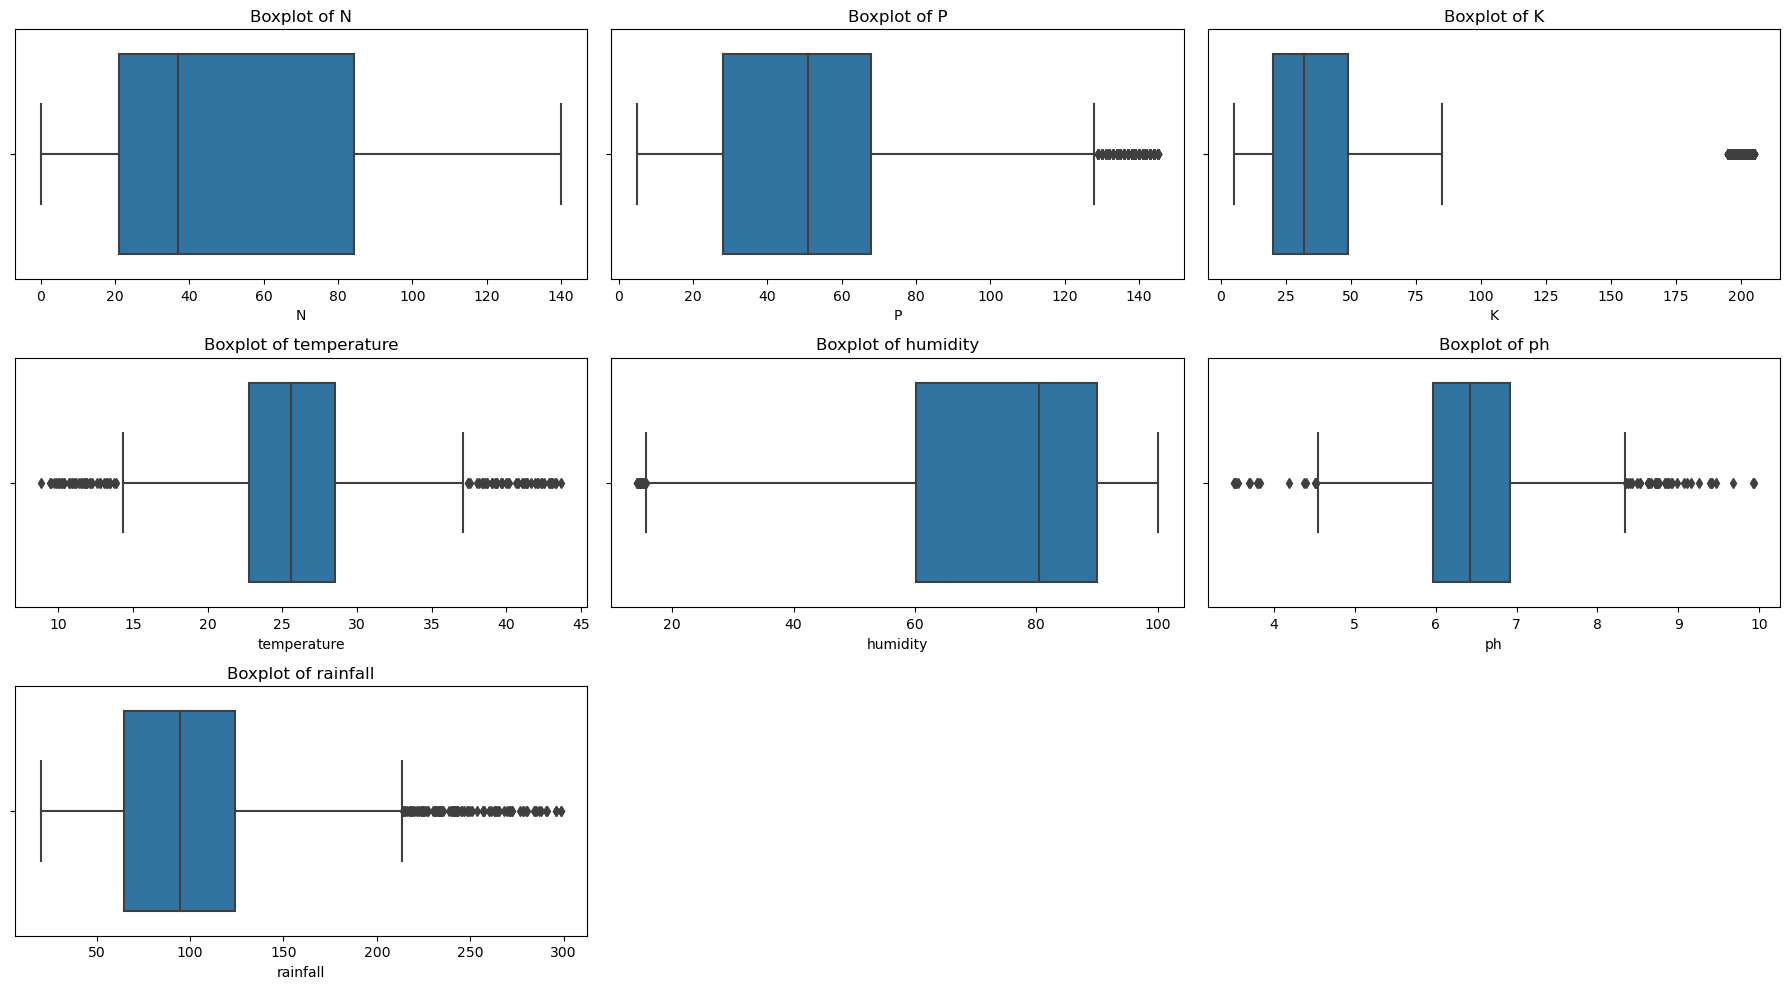

In [7]:

# Boxplot for outlier detection
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(18, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()


In [8]:

# ============================ DATA PREPROCESSING ============================
# Label encoding
crop_dict = {
    'rice': 0, 'maize': 1, 'jute': 2, 'cotton': 3, 'coconut': 4, 'papaya': 5,
    'orange': 6, 'apple': 7, 'muskmelon': 8, 'watermelon': 9, 'grapes': 10,
    'mango': 11, 'banana': 12, 'pomegranate': 13, 'lentil': 14, 'blackgram': 15,
    'mungbean': 16, 'mothbeans': 17, 'pigeonpeas': 18, 'kidneybeans': 19,
    'chickpea': 20, 'coffee': 21
}
df['crop_num'] = df['label'].map(crop_dict)
df.drop(['label'], axis=1, inplace=True)


In [9]:

# Features and labels
X = df.drop(['crop_num'], axis=1)
y = df['crop_num']
y_cat = to_categorical(y, num_classes=22)

# Scaling
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(minmax_scaler.fit_transform(X))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)


In [10]:

# ============================ DEEP LEARNING MODEL ============================
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(22, activation='softmax'))  # 22 crop classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50


/Users/vedniyasvyas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1945 - loss: 2.7849 - val_accuracy: 0.6114 - val_loss: 1.5396
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5742 - loss: 1.4364 - val_accuracy: 0.8205 - val_loss: 0.7029
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7187 - loss: 0.8373 - val_accuracy: 0.8432 - val_loss: 0.4835
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7824 - loss: 0.6413 - val_accuracy: 0.9045 - val_loss: 0.3523
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8311 - loss: 0.4996 - val_accuracy: 0.9182 - val_loss: 0.2957
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8391 - loss: 0.4759 - val_accuracy: 0.9409 - val_loss: 0.2499
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8708 - loss: 0.3809 - val_accuracy: 0.9318 - val_loss: 0.2319
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8679 - loss: 0.3357 - val_accuracy:

In [11]:

# ============================ EVALUATION & VISUALIZATION ============================
# Accuracy and Loss Plot
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

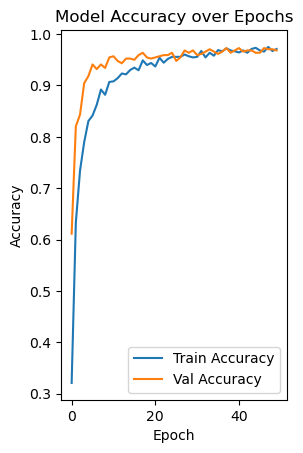

In [12]:

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


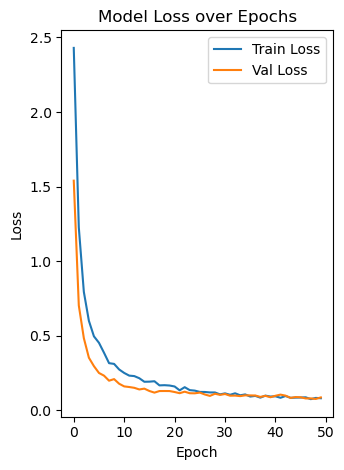

In [13]:

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_performance.png')
plt.show()


In [14]:

# Evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Validation Accuracy: {acc:.2f}")


✅ Validation Accuracy: 0.97


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


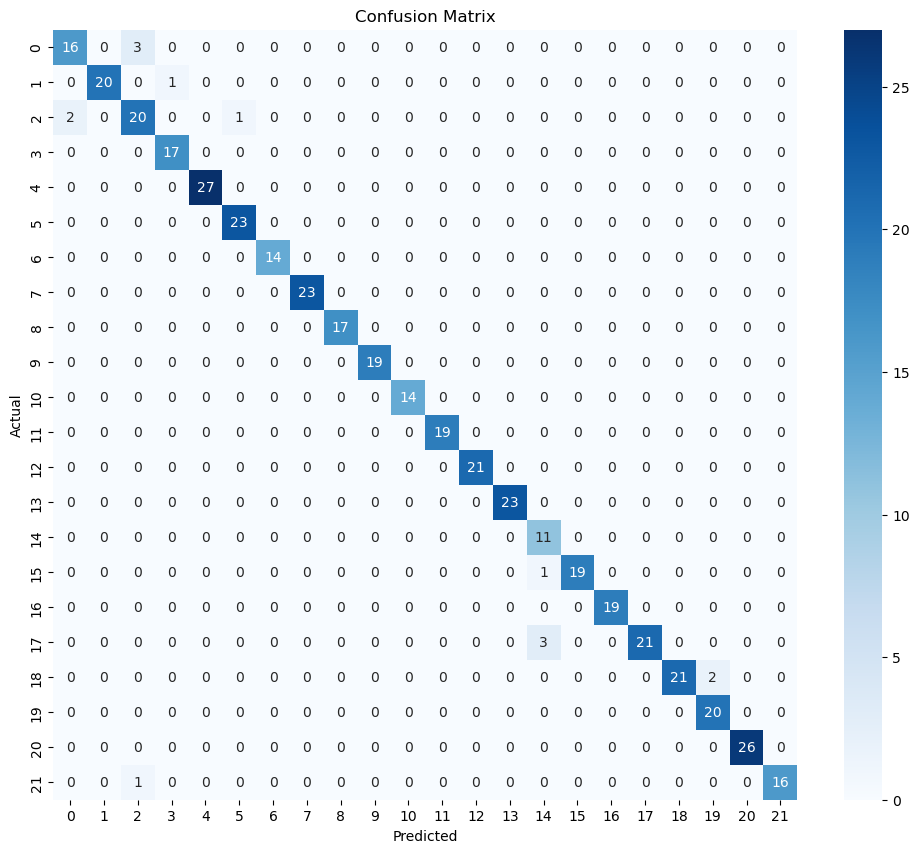

In [15]:

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()


In [16]:

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# ============================ SAVE MODEL ============================
model.save('crop_model_dl.keras')
pickle.dump(minmax_scaler, open('minmaxscaler.pkl', 'wb'))
pickle.dump(standard_scaler, open('standscaler.pkl', 'wb'))

print("✅ Deep learning model and scalers saved successfully!")



📄 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       1.00      0.95      0.98        21
           2       0.83      0.87      0.85        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.73      1.00      0.85        11
          15       1.00      0.95      0.97        20
          16       1.00      1.00      1.00        19
 